**Detect Nuclei**

This notebook explores different approaches to segmentation

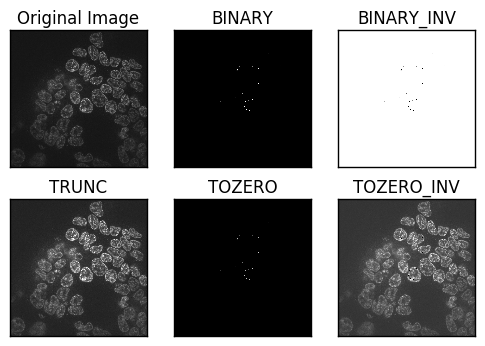

In [38]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import skimage.io as io
io.use_plugin('tifffile')

im = io.imread('C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/Well02_HeLa_PHD2-IDR-PHD3_1/Well02_HeLa_PHD2-IDR-PHD3_1.tif')

img = im[4,:,:,0]

ret,thresh1 = cv.threshold(img,500,60000,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,500,60000,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,500,60000,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,500,60000,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,500,60000,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

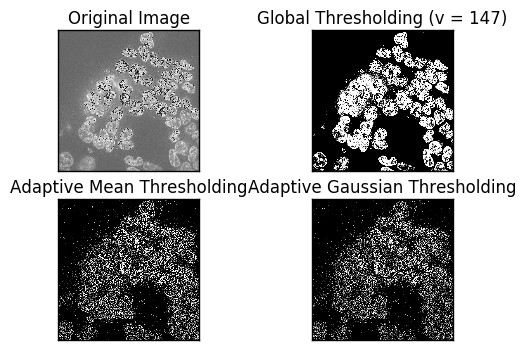

In [123]:
import skimage.io as io
io.use_plugin('tifffile')

im = io.imread('C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/Well02_HeLa_PHD2-IDR-PHD3_1/Well02_HeLa_PHD2-IDR-PHD3_1.tif')

img16 = im[4,:,:,0]

img = (img16).astype('uint8')

ret,th1 = cv.threshold(img,147,200,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,240,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY_INV,25,10)
th3 = cv.adaptiveThreshold(img,240,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY_INV,25,10)
titles = ['Original Image', 'Global Thresholding (v = 147)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

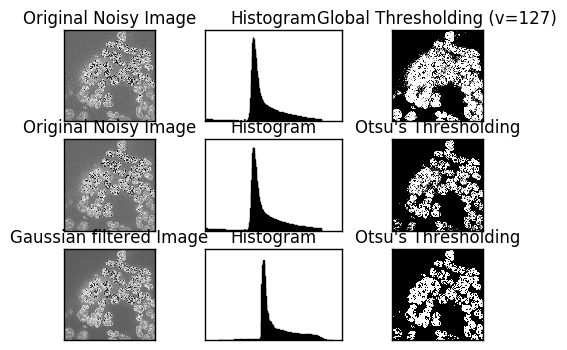

In [109]:
import skimage.io as io
io.use_plugin('tifffile')

im = io.imread('C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/Well02_HeLa_PHD2-IDR-PHD3_1/Well02_HeLa_PHD2-IDR-PHD3_1.tif')

img16 = im[4,:,:,0]

img = (img16).astype('uint8')

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(7,7),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [108]:
ret3

145.0

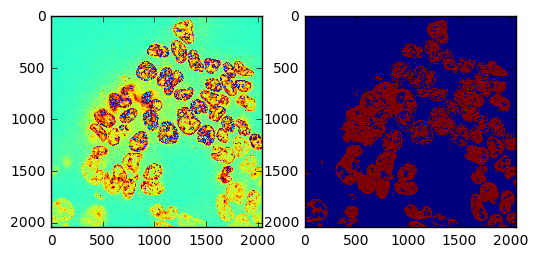

In [110]:
img = (img16).astype('uint8')

images = [img, th3]
plt.subplot(1,2,1),plt.imshow(images[0])
plt.subplot(1,2,2),plt.imshow(images[1])
plt.show()

In [34]:
im = io.imread('C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/Well02_HeLa_PHD2-IDR-PHD3_1/Well02_HeLa_PHD2-IDR-PHD3_1.tif')

img = im[4,:,:,0]

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)   
# Plot Here
plt.figure(figsize=(15,5))
images = [blur, 0, th3]
titles = ['Original Image (X_train)','Gaussian filtered Image (OpenCV)',"Segmentated Image (OpenCV)"]
plt.subplot(1,3,1),plt.imshow(img,'gray')
plt.title(titles[0]), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(images[0],'gray')
plt.title(titles[1]), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(images[2],'gray')
plt.title(titles[2]), plt.xticks([]), plt.yticks([])
plt.show()

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1406: error: (-215:Assertion failed) src.type() == (((0) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function 'cv::threshold'


In [46]:
%matplotlib inline

In [105]:
ret, thresh = cv.threshold(img,500,60000,cv.THRESH_TOZERO_INV)


#Otsu must be 8-bit
#img8 = (img/256).astype('uint8')#sabotage
img8 = (img).astype('uint8')

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img8,(7,7),0)

#ret3,th3 = cv.threshold(img, 500, 60000, cv.THRESH_TOZERO_INV+cv.THRESH_OTSU)
#ret3,th3 = cv.threshold(blur, 500, 60000, cv.THRESH_TOZERO_INV+cv.THRESH_OTSU)
#ret3,th3 = cv.threshold(blur, 500, 60000, cv.THRESH_TOZERO_INV)
#ret3,th3 = cv.threshold(blur, 0, 225, cv.THRESH_TOZERO_INV+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(blur, 0, 225, cv.THRESH_TOZERO_INV+cv.THRESH_OTSU)
ret4,th4 = cv.threshold(blur, 0, 225, cv.THRESH_OTSU)
#ret3,th3 = cv.threshold(img8, 0, 225, cv.THRESH_OTSU)

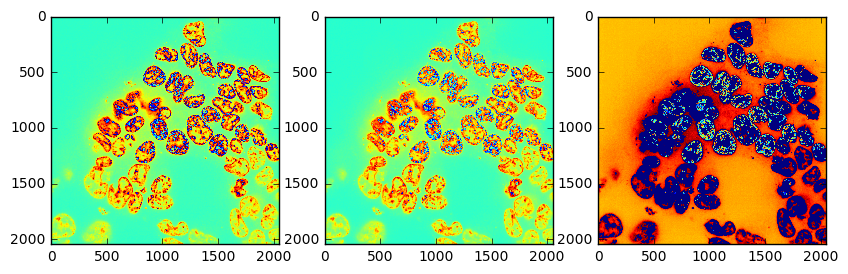

In [106]:
fig, axs = plt.subplots(1, 3, figsize=(10,10))
axs[0].imshow(img8)
axs[1].imshow(blur)
axs[2].imshow(th3)

In [1]:
##Random Walker (slow)
import numpy as np
import matplotlib.pyplot as plt

from skimage.segmentation import random_walker
from skimage.data import binary_blobs          #not used
from skimage.exposure import rescale_intensity #not used
from skimage.feature import peak_local_max
import skimage

In [11]:
import skimage.io as io
io.use_plugin('tifffile')

im = io.imread('C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/Well02_HeLa_PHD2-IDR-PHD3_1/Well02_HeLa_PHD2-IDR-PHD3_1.tif')

img = im[4,:,:,0]

local_maxi = peak_local_max(img, indices=False, footprint=np.ones((20, 20))) ##Using GFP data
local_min = peak_local_max(-img, indices=False, footprint=np.ones((20, 20)))
#markers = ndimage.label(local_maxi)[0]

In [13]:
##Need markers of each phase
hot_cold = rescale_intensity(img, in_range=(150, 500),
                         out_range=(-1, 1))

# The range of the binary image spans over (-1, 1).
# We choose the hottest and the coldest pixels as markers.
markers = np.zeros(data.shape, dtype=np.uint)
markers[data < -0.95] = 1
markers[data > 0.95] = 2

NameError: name 'data' is not defined

In [12]:
# We choose the hottest and the coldest pixels as markers.
#markers = np.zeros(data.shape, dtype=np.uint)
#markers=(np.ones_like(img)*local_min)+(np.ones_like(img)*local_maxi*2)

# Run random walker algorithm
labels = random_walker(img, markers, beta=10, mode='bf')

In [ ]:
plt.imshow(markers)

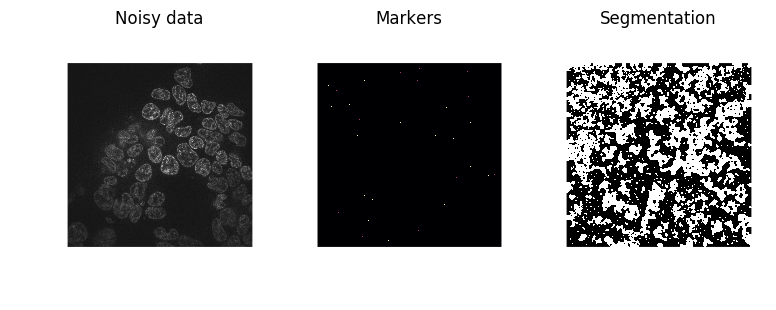

In [10]:
# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 3.2),
                                    sharex=True, sharey=True)
ax1.imshow(img, cmap='gray', interpolation='nearest')
ax1.axis('off')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='magma', interpolation='nearest')
ax2.axis('off')
ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray', interpolation='nearest')
ax3.axis('off')
ax3.set_title('Segmentation')

fig.tight_layout()
plt.show()

**Another Option**

https://www.learnopencv.com/blob-detection-using-opencv-python-c/

In [1]:
# Standard imports
import cv2
import numpy as np;
import skimage.io as io
io.use_plugin('tifffile')

#Import image
im = io.imread('C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/Well02_HeLa_PHD2-IDR-PHD3_1/Well02_HeLa_PHD2-IDR-PHD3_1.tif')

img16 = im[4,:,:,0]

img = (img16).astype('uint8')

In [ ]:
## check opencv version and construct the detector
is_v2 = cv2.__version__.startswith("2.")
if is_v2:
    detector = cv2.SimpleBlobDetector()
else:
    detector = cv2.SimpleBlobDetector_create()
 
# Detect blobs
keypoints = detector.detect(img)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)